In [2]:
import numpy as np

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject

# Question 1

In [3]:
from types import SimpleNamespace

class ExchangeEconomyClass:

    def __init__(self):

        par = self.par = SimpleNamespace()

        # a. preferences
        par.alpha = 1/3
        par.beta = 2/3

        # b. endowments
        par.w1A = 0.8
        par.w2A = 0.3
        par.w1B = 1 - par.w1A
        par.w2B = 1 - par.w2A

    def utility_A(self,x1A,x2A):
        par = self.par
        util_A = x1A**(par.alpha)*x2A**(1-par.alpha)

        return util_A
        

    def utility_B(self,x1B,x2B):
        par = self.par
        util_B = x1B**(par.beta)*x2B**(1-par.beta)

        return util_B

    def demand_A(self,p1):
        par = self.par
        I_A = p1*par.w1A + par.w2A
        x1A_star = par.alpha*((I_A)/(p1))
        x2A_star = (1-par.alpha)*I_A

        return x1A_star,x2A_star

    def demand_B(self,p1):
        par = self.par
        I_B = p1*par.w1B + par.w2B
        x1B_star = par.beta*((I_B)/(p1))
        x2B_star = (1-par.beta)*I_B

        return x1B_star,x2B_star
        

    def check_market_clearing(self,p1):

        par = self.par

        x1A,x2A = self.demand_A(p1)
        x1B,x2B = self.demand_B(p1)

        eps1 = x1A-par.w1A + x1B-(1-par.w1A)
        eps2 = x2A-par.w2A + x2B-(1-par.w2A)

        return eps1,eps2

In [4]:

market = ExchangeEconomyClass()

demand_a = market.demand_A(5)
print(demand_a)

demand_b = market.demand_B(5)
print(demand_b)

check = market.check_market_clearing(0.94445)

print(check)

(0.2866666666666666, 2.8666666666666667)
(0.22666666666666663, 0.5666666666666667)
(-3.5293910036204856e-06, 3.3333333335772153e-06)


In [74]:

# 1 Lav x1A og x2A fra 0 til 1 med 75 intervallerpunkter
N = 150
x1A_vec = np.linspace(0,1,N)
x2A_vec = np.linspace(0,1,N)
utility = np.zeros((N, N))
utility[:] = np.nan

#print(utility)

uA_bar = market.utility_A(market.par.w1A, market.par.w2A)
uB_bar = market.utility_B(market.par.w1B, market.par.w2B)
print(uA_bar)
print(uB_bar)
print("\n")

# Lav for loop der kører gennem de to vektorer
for i, x1a in enumerate(x1A_vec):
      for j, x2a in enumerate(x2A_vec):
        uA = market.utility_A(x1a, x2a)
        x1b = 1 - x1a
        x2b = 1 - x2a
        uB = market.utility_B(x1b, x2b)
        if uA >= uA_bar and uB >= uB_bar:
            utility[i, j] = market.utility_A(x1a, x2a)
     
print(utility)


0.41601676461038084
0.30365889718756617


[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [75]:
kombinationer = []

for x1a in x1A_vec:
      for x2a in x2A_vec:
        uA = market.utility_A(x1a, x2a)
        x1b = 1 - x1a
        x2b = 1 - x2a
        uB = market.utility_B(x1b, x2b)
        if uA >= uA_bar and uB >= uB_bar:
            kombinationer.append((x1a, x2a))


print(kombinationer)

# Sammenlign utility fra alle kombinationer

[(0.08053691275167785, 0.9463087248322147), (0.08053691275167785, 0.9530201342281879), (0.08053691275167785, 0.959731543624161), (0.08053691275167785, 0.9664429530201342), (0.087248322147651, 0.912751677852349), (0.087248322147651, 0.9194630872483222), (0.087248322147651, 0.9261744966442953), (0.087248322147651, 0.9328859060402684), (0.087248322147651, 0.9395973154362416), (0.087248322147651, 0.9463087248322147), (0.087248322147651, 0.9530201342281879), (0.087248322147651, 0.959731543624161), (0.09395973154362416, 0.8791946308724832), (0.09395973154362416, 0.8859060402684563), (0.09395973154362416, 0.8926174496644295), (0.09395973154362416, 0.8993288590604027), (0.09395973154362416, 0.9060402684563759), (0.09395973154362416, 0.912751677852349), (0.09395973154362416, 0.9194630872483222), (0.09395973154362416, 0.9261744966442953), (0.09395973154362416, 0.9328859060402684), (0.09395973154362416, 0.9395973154362416), (0.09395973154362416, 0.9463087248322147), (0.09395973154362416, 0.953020

# Basic Edgeworth box

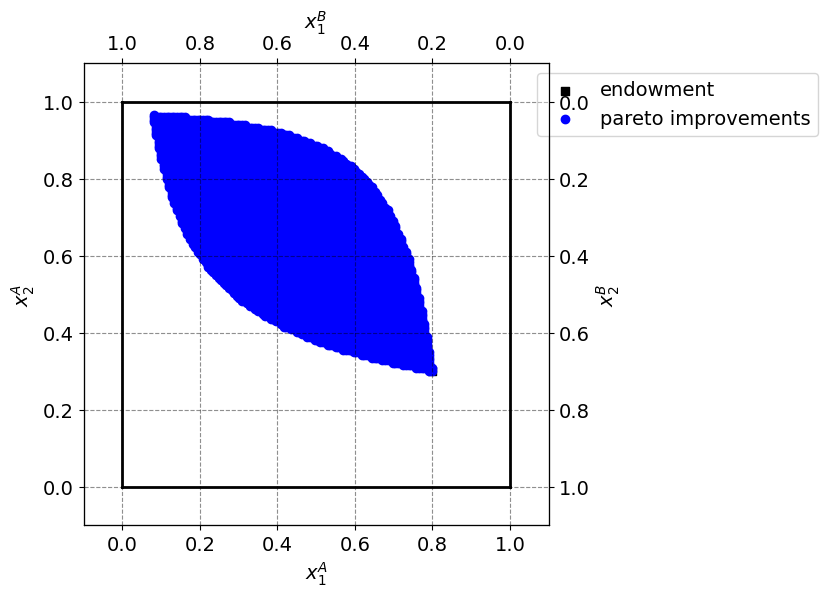

In [76]:
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

par = market.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A
ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='endowment')


x1, x2 = zip(*kombinationer)
ax_A.scatter(x1,x2,marker='o',color='blue',label='pareto improvements')

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));